In [1]:
import pandas as pd
import numpy as np
#from google.colab import drive
from statsmodels.tools.eval_measures import rmse

In [2]:
#drive.mount('/content/drive')

In [3]:
def df_split(df):
  categoria = []
  for x in df['category_name']:
    categoria.append(x.split('/'))
  return categoria


def sub_categoria(df):  
  lista = df_split(df)
  for y in range(len(lista)):
    lista[y] = lista[y][1]
  return lista

In [4]:
filtro_men = pd.read_csv('https://github.com/AugustoCRX/bootcamp_blue/blob/main/novos_arquivos_treino/Limpeza%20v3/filtro_Men_train_v3.csv?raw=true')

In [5]:
filtro_men['sub_category_name'] = sub_categoria(filtro_men)

In [6]:
filtro_men.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,date,stock,date2,day,month,year,description_clear,name_clear,brands_filter,sub_category_name
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Other,10.0,1,No description yet,17-5-2018,27,2018-05-17,17,5,2018,descript yet,mlb cincinnati red shirt size xl,popular_brand,Tops
1,Air Jordan carmine 6s,3,Men/Shoes/Athletic,Air Jordan,66.0,0,They are 100 percent authentic. They are beate...,17-5-2018,34,2018-05-17,17,5,2018,100 percent authent beater still lot life orig...,air jordan carmin 6,jordan,Shoes
2,Under Armour maroon and gray shirt metal,4,Men/Athletic Apparel/Shirts & Tops,Under Armour,6.0,1,"Has some wear to the back, and few white spots...",1-8-2018,2,2018-01-08,8,1,2018,ha wear back white spot believ wash,armour maroon gray shirt metal,under armour,Athletic Apparel
3,Patagonia Fleece Jacket,3,Men/Coats & Jackets/Fleece Jacket,patagonia,36.0,0,Men's XXL In Good Condition Minor mark on Sleeve,24-11-2018,1,2018-11-24,24,11,2018,men xxl good condit minor mark sleev,patagonia fleec jacket,patagonia,Coats & Jackets
4,Trump Shirt,3,Men/Tops/T-shirts,Other,9.0,0,Worn once; will be washed before sent,13-8-2018,9,2018-08-13,13,8,2018,worn wash sent,trump shirt,basics_brand,Tops


In [7]:
filtro_men['sub_category_name'].value_counts()

Shoes                    15196
Men's Accessories        13046
Tops                     10684
Athletic Apparel          7910
Sweats & Hoodies          5958
Jeans                     2964
Coats & Jackets           2615
Shorts                    1145
Sweaters                  1135
Pants                      730
Other                      680
Swimwear                   406
Blazers & Sport Coats       57
Suits                       51
Name: sub_category_name, dtype: int64

# Modelo 01
Regressão Linear sem restrição de preço e com variaveis dummies nas variaveis categoricas sub_category_name, shipping e brands_filter

In [8]:
import statsmodels.api as sm

In [9]:
filtro_men = pd.get_dummies(filtro_men, columns=['sub_category_name','brands_filter','shipping'])

In [10]:
X = filtro_men.drop(['name','category_name','item_description','date','stock','date2','day','month','year','stock','price','brand_name','description_clear','name_clear'],axis=1)
y = filtro_men.price
X = sm.add_constant(X)
m1_rl = sm.OLS(exog=X,endog=y)
m1_result = m1_rl.fit()
print(m1_result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     373.5
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:35:40   Log-Likelihood:            -3.0700e+05
No. Observations:               62577   AIC:                         6.143e+05
Df Residuals:                   62449   BIC:                         6.154e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [11]:
filtro_men['price'].describe()

count    62577.000000
mean        37.056299
std         43.363462
min          3.000000
25%         14.000000
50%         24.000000
75%         41.000000
max       1309.000000
Name: price, dtype: float64

In [12]:
m1_ypred = m1_result.predict(X)
m1_RMSE = rmse(y,m1_ypred)
m1_RMSE.round(2)

32.69

# Modelo 02

Regressão Linear com restrição de preço ate 150 dolares e com variaveis dummies nas variaveis categoricas sub_category_name, shipping e brands_filter

In [13]:
filtro_men_ajustado = filtro_men[filtro_men['price']<=150]

In [14]:
X1 = filtro_men_ajustado.drop(['name','category_name','item_description','date','stock','date2','day','month','year','stock','price','brand_name','description_clear','name_clear'],axis=1)
y1 = filtro_men_ajustado.price
X1 = sm.add_constant(X1)
m2_rl = sm.OLS(exog=X1,endog=y1)
m2_result = m2_rl.fit()
print(m2_result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     493.7
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:35:41   Log-Likelihood:            -2.6402e+05
No. Observations:               60773   AIC:                         5.283e+05
Df Residuals:                   60646   BIC:                         5.294e+05
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [15]:
filtro_men_ajustado['price'].describe()

count    60773.000000
mean        31.653432
std         26.535585
min          3.000000
25%         14.000000
50%         22.000000
75%         40.000000
max        150.000000
Name: price, dtype: float64

In [16]:
m2_ypred = m2_result.predict(X1)
m2_RMSE = rmse(y1,m2_ypred)
m2_RMSE.round(2)

18.64

# Modelo 03

Arvore de Regressão usando como criterio de seleção dos nós a métrica R²

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
X2 = filtro_men.drop(['name','category_name','item_description','date','stock','date2','day','month','year','stock','price','brand_name','description_clear','name_clear'],axis=1)
y2 = filtro_men.price
m3_dtr = DecisionTreeRegressor(random_state=10)
result2 = m3_dtr.fit(X2,y2)
m3_r2 = result2.score(X2,y2)
m3_ypred = result2.predict(X2)
m3_mse = mean_squared_error(y2,m3_ypred)
m3_rmse = m3_mse**0.5
print(f"R² = {m3_r2.round(2)}")
print(f"MSE = {m3_mse.round(2)}")
print(f"RMSE = {m3_rmse.round(2)}")

R² = 0.55
MSE = 845.18
RMSE = 29.07


# Modelo 04

Arvore de Regressão com restrição de preço ate 150 dolares e com variaveis dummies nas variaveis categoricas sub_category_name, shipping e brands_filter

In [19]:
X3 = filtro_men_ajustado.drop(['name','category_name','item_description','date','stock','date2','day','month','year','stock','price','brand_name','description_clear','name_clear'],axis=1)
y3 = filtro_men_ajustado.price
m4_dtr = DecisionTreeRegressor(random_state=10)
result3 = m4_dtr.fit(X3,y3)
m4_r2 = result3.score(X3,y3)
m4_ypred = result3.predict(X3)
m4_mse = mean_squared_error(y3,m4_ypred)
m4_rmse = m4_mse**0.5
print(f"R² = {m4_r2.round(2)}")
print(f"MSE = {m4_mse.round(2)}")
print(f"RMSE = {m4_rmse.round(2)}")

R² = 0.61
MSE = 275.49
RMSE = 16.6


# Resultados

| Modelo | R² |RMSE | Observação |
| --- | --- | --- | --- |
| Modelo 01 | 43,2% | 32,69 | Regressão Linear |
| Modelo 02 | 50,6% | 18,64 | Regressão Linear (preço <= 150) |
| Modelo 03 | 55,0% | 29,07 | Arvore Regressão (criterio = R²) |
| Modelo 04 | 61,0% | 16,60 | Arvore Regressão (criterio = R², preço <= 150) |

In [20]:
import matplotlib.pyplot as plt

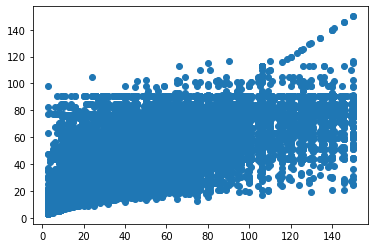

In [21]:
plt.scatter(x=y3,y=m4_ypred)

'ax.set_xlabel(\'x label\')  # Add an x-label to the axes.\nax.set_ylabel(\'y label\')  # Add a y-label to the axes.\nax.set_title("Simple Plot")  # Add a title to the axes.\nax.legend();  # Add a legend.'

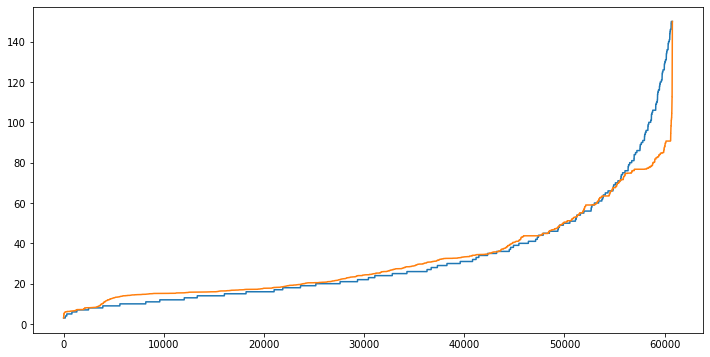

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sorted(y3))  # Plot some data on the axes.
ax.plot(sorted(m4_ypred))  # Plot more data on the axes...
#ax.plot(x, x**3, label='cubic')  # ... and some more.
'''ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.'''